 #  **Analysing Alternative RE Portfolio Data**
 ---


In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import csv


from matplotlib import pyplot as plt
%matplotlib inline

### Stocks Trad_Energy

In [2]:
RE_Energy = Path("../../Data/Alt_RE_Stocks.csv")
Alt_RE_df = pd.read_csv(RE_Energy)

Alt_RE_df.head(10) 

,Symbol,Description,Exchange,Sector,Sub-Industry,Last Trade,% Change,Volume,Market Cap (B),Market_Cap_W,Dividend Yield,Divid_Yield_W,10 Years Return,Stock_Ret_W,iqual weighted
0,SPY,Spdr S&P 500,NYSE ARCA,--,--,390.03,-0.18,83240971.0,340.71,1.00,1.46,1.00,2.84,1.00,1.00
1,BAM,Brookfield Asset Mgm F,NYSE,Financials,Asset Management & Custody Banks,43.45,-0.82,1896145.0,66.12,0.16,1.20,0.11,4.09,0.22,0.14
2,ETN,Eaton Corp Plc F,NYSE,Industrials,Electrical Components & Equipment,127.69,2.08,2662222.0,50.04,0.12,2.29,0.22,2.95,0.16,0.14
3,GE,General Electric Co,NYSE,Industrials,Industrial Conglomerates,12.02,3.35,61049003.0,104.95,0.26,0.33,0.03,0.72,0.04,0.14
4,NEE,Nextera Energy Inc,NYSE,Utilities,Electric Utilities,78.20,-3.26,9660915.0,159.12,0.39,1.79,0.17,4.55,0.25,0.14
5,NRG,Nrg Energy Inc,NYSE,Utilities,Electric Utilities,39.85,4.43,5459721.0,9.91,0.02,3.26,0.31,1.67,0.09,0.14
6,OC,Owens Corning Fiberglas,NYSE,Industrials,Building Products,85.08,3.33,968911.0,8.82,0.02,1.22,0.12,2.50,0.14,0.14
7,ORA,Ormat Technologies,NYSE,Utilities,Renewable Electricity,112.72,3.82,668033.0,6.60,0.02,0.39,0.04,1.97,0.11,0.14
8,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.56,1.00,10.48,1.00,18.44,1.00,1.00


### Weight Distribution

In [3]:
# Create Scenaries DataFrame

# Set the tickers
RE_Stocks = ['BAM', 'ETN', 'GE', 'NEE', 'NRG', 'OC', 'ORA']


# Set current amount of shares data
RE_iqual_Dist = {
    "RE_iqual_Dist": [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]}

RE_Market_Cap_Dist = {
    "RE_Market_Cap_Dist": [0.16, 0.13, 0.26, 0.39, 0.02, 0.02, 0.02]}

RE_Divid_Yield_Dist = {
    "RE_Divid_Yield_Dist": [0.11, 0.22, 0.03, 0.17, 0.31, 0.12, 0.04]}

RE_Ten_Years_Return_Dist = {
    "RE_Ten_Years_Return_Dist": [0.22, 0.16, 0.04, 0.25, 0.09, 0.14, 0.11]}


# Create the shares DataFrame
df_RE_iqual = pd.DataFrame(RE_iqual_Dist, index=RE_Stocks)
df_RE_MC = pd.DataFrame(RE_Market_Cap_Dist, index=RE_Stocks)
df_RE_DY = pd.DataFrame(RE_Divid_Yield_Dist, index=RE_Stocks)
df_RE_Ret = pd.DataFrame(RE_Ten_Years_Return_Dist, index=RE_Stocks)
   

**# Data Cleaning**

In [4]:
# Reading .csv returns
PATH2 = Path('../../Data/ALTERNATIVE_RE_Portfolio.csv')
ALTERNATIVE_RE = pd.read_csv(PATH2, index_col="Date", infer_datetime_format=True, parse_dates=True)
#ALTERNATIVE_RE = ALTERNATIVE_RE.set_index('Date')
ALTERNATIVE_RE.head()


,BAM,ETN,GE,NEE,NRG,OC,ORA
Date,,,,,,,
2010-01-04,9.43,32.16,15.45,13.31,23.87,26.01,37.87
2010-01-05,9.58,31.97,15.53,13.18,24.24,26.11,38.00
2010-01-06,9.48,31.83,15.45,13.31,24.77,25.96,38.00
2010-01-07,9.50,32.30,16.25,13.28,24.91,26.40,37.52
2010-01-08,9.55,33.03,16.60,13.16,24.50,26.37,36.78


In [5]:
# Checking file information:
ALTERNATIVE_RE.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BAM     2516 non-null   float64
 1   ETN     2516 non-null   float64
 2   GE      2516 non-null   float64
 3   NEE     2516 non-null   float64
 4   NRG     2516 non-null   float64
 5   OC      2516 non-null   float64
 6   ORA     2516 non-null   float64
dtypes: float64(7)
memory usage: 157.2 KB


In [6]:
# Count nulls
ALTERNATIVE_RE.isnull().sum()

BAM    0
ETN    0
GE     0
NEE    0
NRG    0
OC     0
ORA    0
dtype: int64

In [7]:
# Drop nulls
ALTERNATIVE_RE = ALTERNATIVE_RE.dropna()

In [8]:
# Validating all nulls have been dropped
ALTERNATIVE_RE.isnull().sum()

BAM    0
ETN    0
GE     0
NEE    0
NRG    0
OC     0
ORA    0
dtype: int64

In [9]:
ALTERNATIVE_RE.head()

,BAM,ETN,GE,NEE,NRG,OC,ORA
Date,,,,,,,
2010-01-04,9.43,32.16,15.45,13.31,23.87,26.01,37.87
2010-01-05,9.58,31.97,15.53,13.18,24.24,26.11,38.00
2010-01-06,9.48,31.83,15.45,13.31,24.77,25.96,38.00
2010-01-07,9.50,32.30,16.25,13.28,24.91,26.40,37.52
2010-01-08,9.55,33.03,16.60,13.16,24.50,26.37,36.78


In [10]:
ALT_RE_returned = ALTERNATIVE_RE.pct_change()
ALT_RE_return = ALT_RE_returned.dropna()
ALT_RE_return.head()

,BAM,ETN,GE,NEE,NRG,OC,ORA
Date,,,,,,,
2010-01-05,0.015907,-0.005908,0.005178,-0.009767,0.015501,0.003845,0.003433
2010-01-06,-0.010438,-0.004379,-0.005151,0.009863,0.021865,-0.005745,0.000000
2010-01-07,0.002110,0.014766,0.051780,-0.002254,0.005652,0.016949,-0.012632
2010-01-08,0.005263,0.022601,0.021538,-0.009036,-0.016459,-0.001136,-0.019723
2010-01-11,-0.013613,0.045413,0.009639,-0.000760,0.009388,-0.000758,0.010604


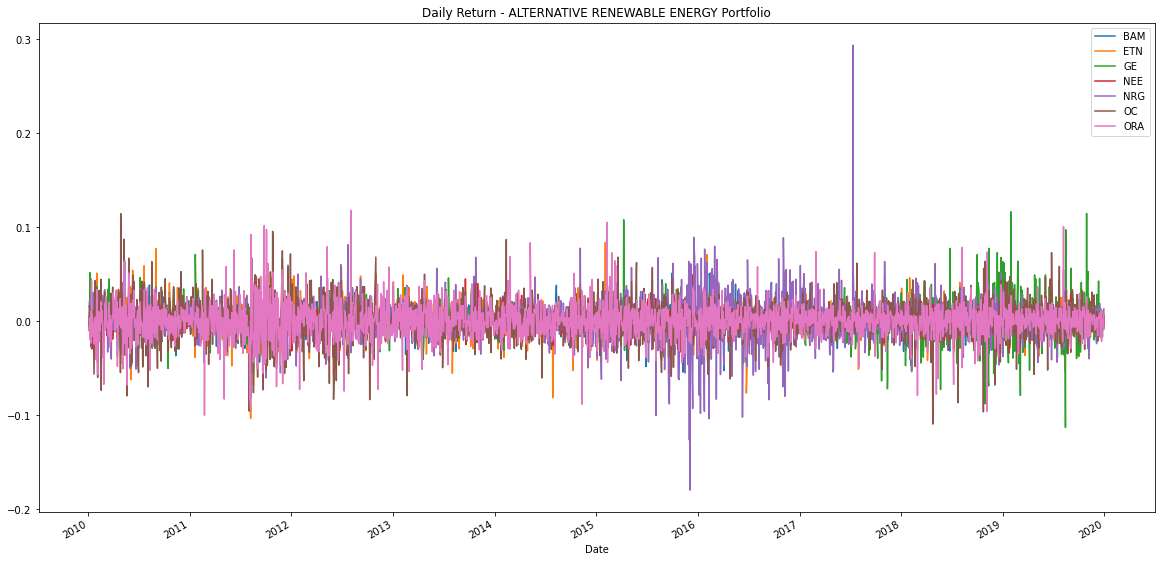

In [11]:
ALT_RE_return.plot(figsize=(20,10), title = "Daily Return - ALTERNATIVE RENEWABLE ENERGY Portfolio");

In [12]:
# Cumulative Return
ALT_RE_cum_return = (1 + ALT_RE_return).cumprod()
ALT_RE_cum_return.tail()

,BAM,ETN,GE,NEE,NRG,OC,ORA
Date,,,,,,,
2019-12-24,4.074231,2.937811,0.724272,4.517656,1.671135,2.509035,1.977555
2019-12-26,4.095440,2.955224,0.726861,4.544703,1.643486,2.509035,1.967785
2019-12-27,4.106045,2.953669,0.723625,4.555222,1.643486,2.507113,1.967520
2019-12-30,4.088017,2.951803,0.717152,4.531931,1.643486,2.489427,1.984156
2019-12-31,4.085896,2.945274,0.722330,4.548460,1.665270,2.503652,1.967785


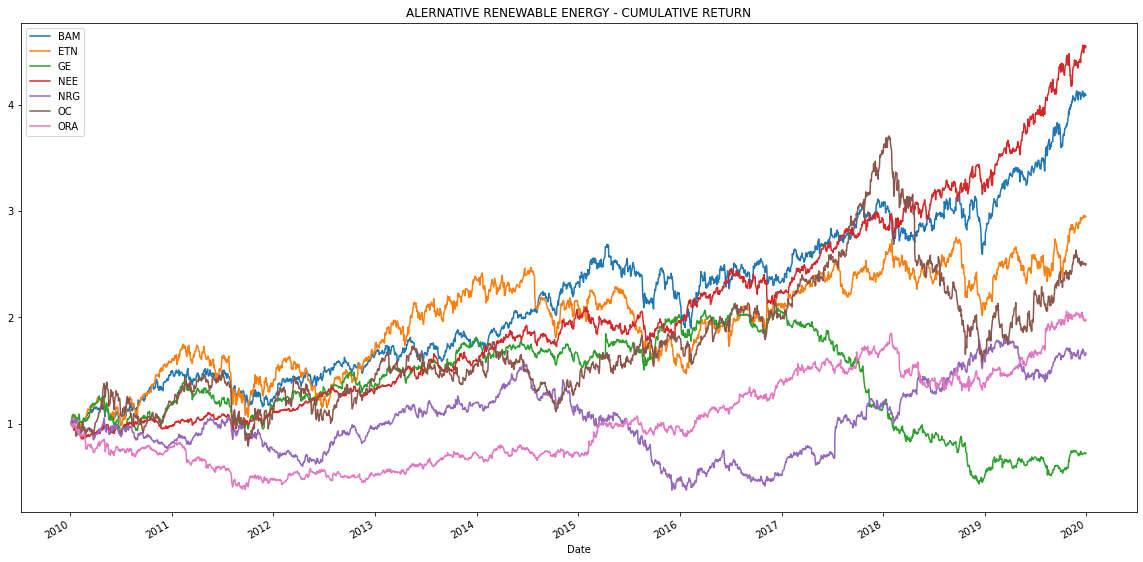

In [14]:
ALT_RE_cum_return.plot(figsize=(20,10), title = "ALERNATIVE RENEWABLE ENERGY - CUMULATIVE RETURN");

## **S&P 500 Returns**

**Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.**

In [15]:
# Reading S&P 500 Closing Prices
spy = Path("../../Data/SPY_close.csv")
spy = pd.read_csv(spy, index_col="Date", infer_datetime_format=True, parse_dates=True)

spy.head()

,SPY
Date,
2010-01-04,113.33
2010-01-05,113.63
2010-01-06,113.71
2010-01-07,114.19
2010-01-08,114.57


In [16]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [17]:
# Fix Data Typesaa
spy['SPY'] = spy['SPY'].astype('float')
spy['SPY'].dtype

dtype('float64')

In [18]:
# Calculate Daily Returns
spy_return = spy.pct_change()
spy_return.head()

,SPY
Date,
2010-01-04,NaN
2010-01-05,0.002647
2010-01-06,0.000704
2010-01-07,0.004221
2010-01-08,0.003328


In [19]:
# Drop nulls
spy_return = spy_return.dropna()

In [20]:
# Checking file information:
spy_return.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2010-01-05 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2515 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


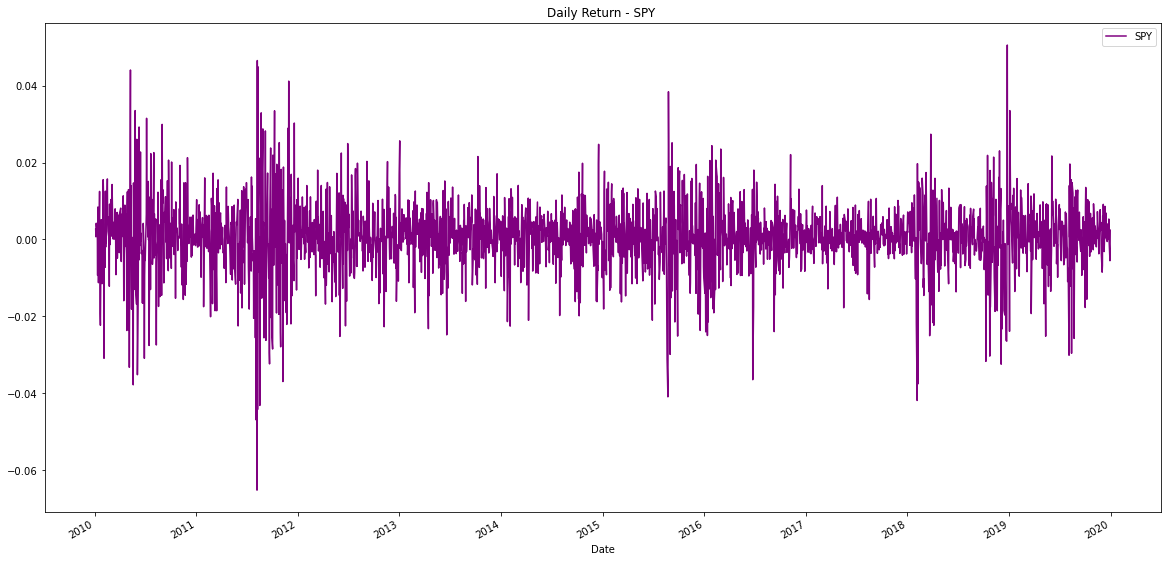

In [21]:
spy_return.plot(figsize=(20,10), title = "Daily Return - SPY ", color= 'purple');

In [22]:
# Cumulative Return
spy_cum_return = (1 + spy_return).cumprod()
spy_cum_return.tail()

,SPY
Date,
2019-12-24,2.834466
2019-12-26,2.849554
2019-12-27,2.848848
2019-12-30,2.833142
2019-12-31,2.840025


In [23]:
spy_cum_return.sum()

SPY    4356.110915
dtype: float64

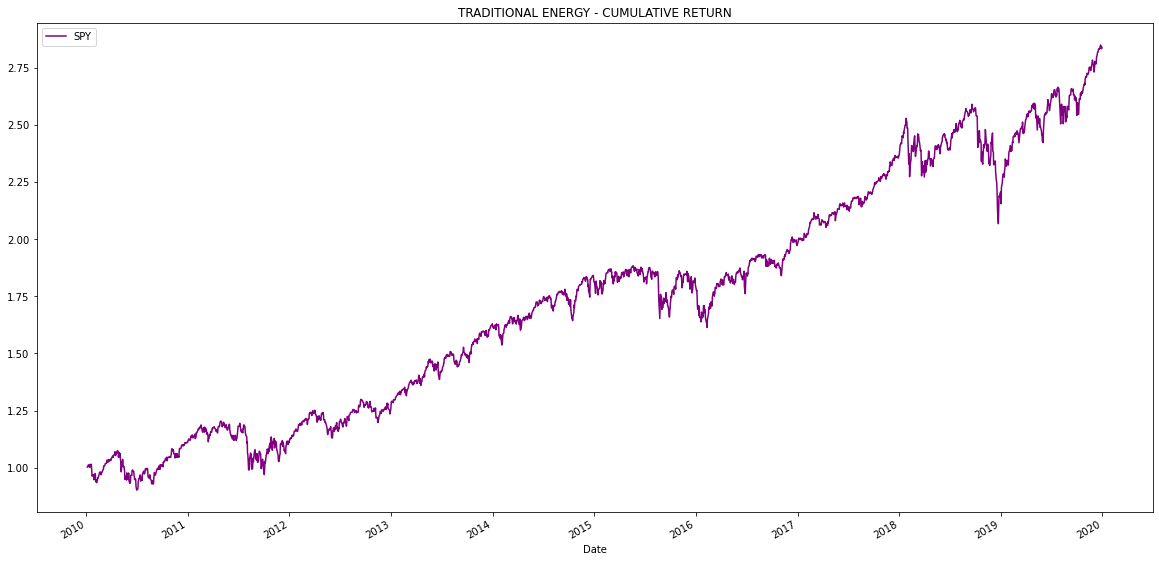

In [24]:
spy_cum_return.plot(figsize=(20,10), title = "TRADITIONAL ENERGY - CUMULATIVE RETURN", color = 'purple');

# Portfolio Analysis

### Setting Porfotlios different Weights

,RE_iqual_Dist
BAM,0.142857
ETN,0.142857
GE,0.142857
NEE,0.142857
NRG,0.142857
OC,0.142857
ORA,0.142857


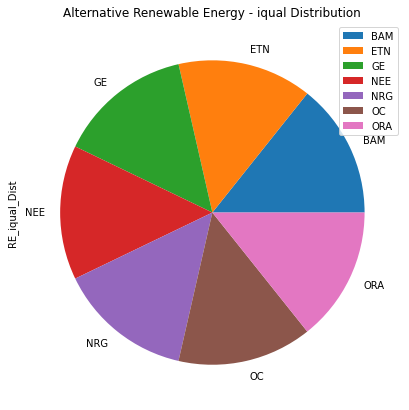

In [25]:
# Display savings DataFrame
display(df_RE_iqual)
# Plot savings pie chart
df_RE_iqual.plot.pie(y="RE_iqual_Dist", title="Alternative Renewable Energy - iqual Distribution", figsize=(7, 7));

In [26]:
# Set weights
weights = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]

# Calculate portfolio return
PORT_ALT_RE_EqualyWeighted = ALT_RE_return.dot(weights)

# Display sample data

 
PORT_ALT_RE_EqualyWeighted.head()

Date
2010-01-05    0.004027
2010-01-06    0.000859
2010-01-07    0.010910
2010-01-08    0.000435
2010-01-11    0.008559
dtype: float64

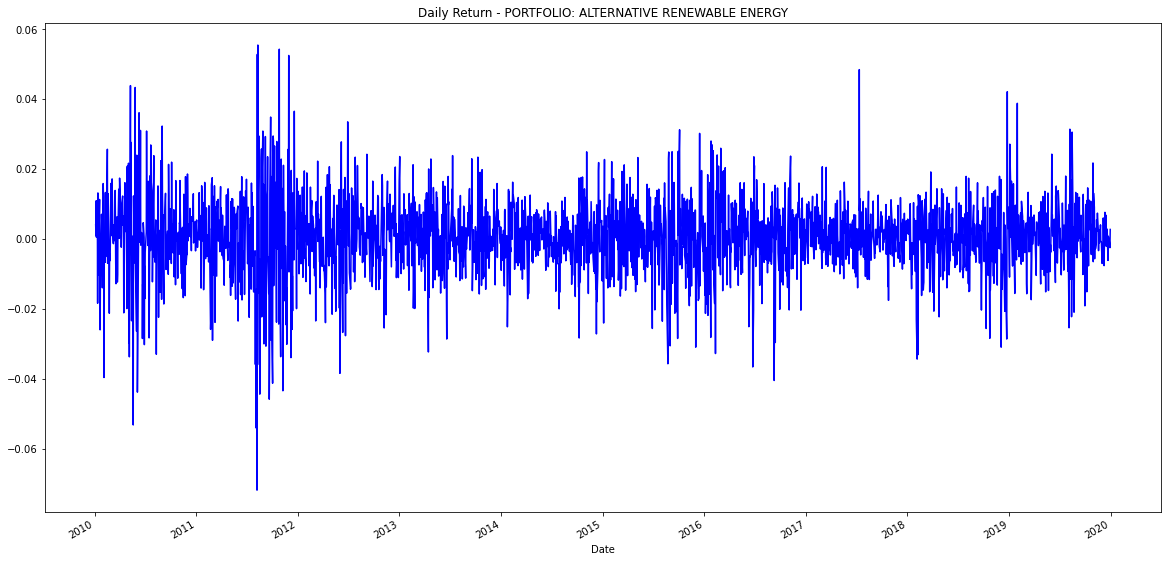

In [27]:
PORT_ALT_RE_EqualyWeighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: ALTERNATIVE RENEWABLE ENERGY", color= 'blue');

,RE_Market_Cap_Dist
BAM,0.16
ETN,0.13
GE,0.26
NEE,0.39
NRG,0.02
OC,0.02
ORA,0.02


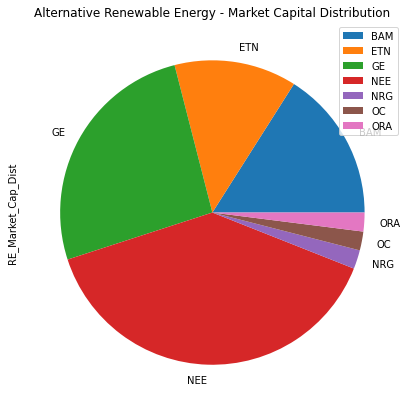

In [28]:
# Display savings DataFrame
display(df_RE_MC)
# Plot savings pie chart
df_RE_MC.plot.pie(y="RE_Market_Cap_Dist", title="Alternative Renewable Energy - Market Capital Distribution", figsize=(7,7), normalize=False );

In [29]:
# Set weight by Market Capital
weights = [0.16, 0.12, 0.26, 0.39, 0.02, 0.02, 0.02]

# Calculate portfolio return
PORT_ALT_RE_M_Cap_Weighted = ALT_RE_return.dot(weights)

# Display sample data

 
PORT_ALT_RE_M_Cap_Weighted.head()

Date
2010-01-05   -0.000171
2010-01-06    0.000634
2010-01-07    0.014893
2010-01-08    0.004884
2010-01-11    0.005866
dtype: float64

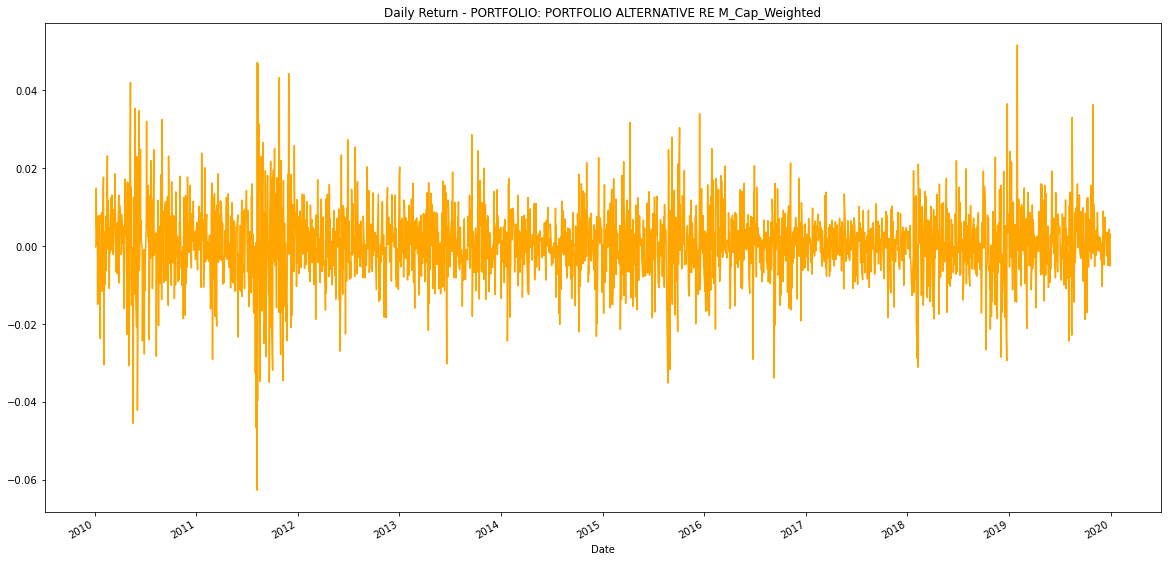

In [30]:
PORT_ALT_RE_M_Cap_Weighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: PORTFOLIO ALTERNATIVE RE M_Cap_Weighted", color='orange');

,RE_Divid_Yield_Dist
BAM,0.11
ETN,0.22
GE,0.03
NEE,0.17
NRG,0.31
OC,0.12
ORA,0.04


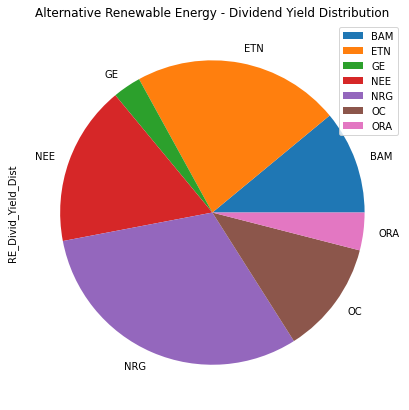

In [31]:
# Display savings DataFrame
display(df_RE_DY)
# Plot savings pie chart
df_RE_DY.plot.pie(y="RE_Divid_Yield_Dist", title="Alternative Renewable Energy - Dividend Yield Distribution", figsize=(7, 7));

In [32]:
# Set weight by Dividend Yield
weights = [0.11, 0.22, 0.03, 0.17, 0.31, 0.12, 0.04]

# Calculate portfolio return
PORT_ALT_RE_Dividend_Weighted = ALT_RE_return.dot(weights)

# Display sample data

 
PORT_ALT_RE_Dividend_Weighted.head()

Date
2010-01-05    0.004349
2010-01-06    0.005499
2010-01-07    0.007932
2010-01-08   -0.001367
2010-01-11    0.011897
dtype: float64

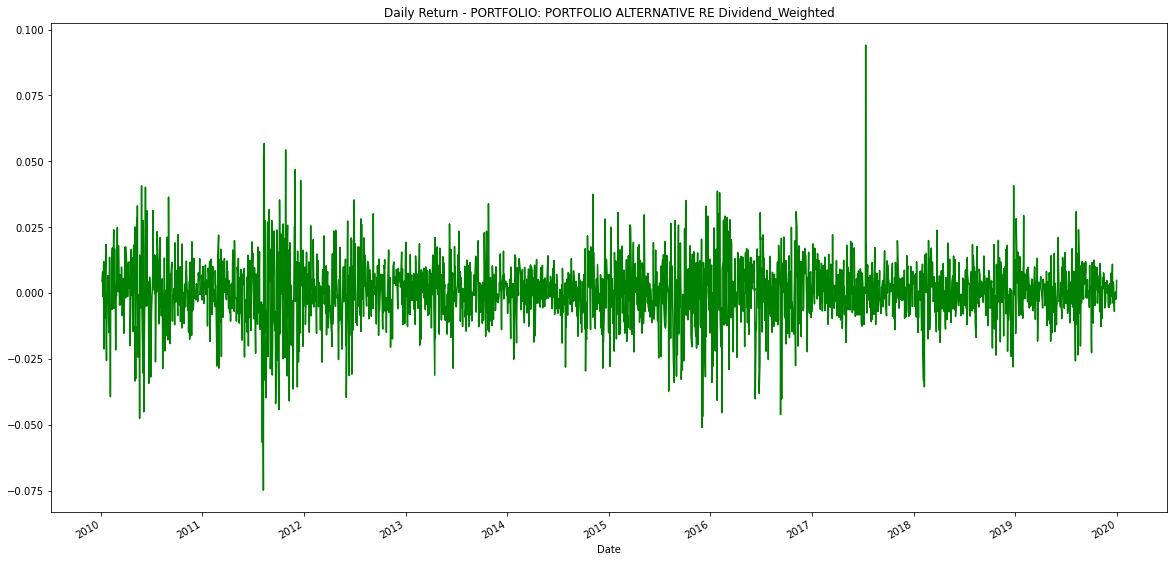

In [33]:
PORT_ALT_RE_Dividend_Weighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: PORTFOLIO ALTERNATIVE RE Dividend_Weighted", color='green');

,RE_Ten_Years_Return_Dist
BAM,0.22
ETN,0.16
GE,0.04
NEE,0.25
NRG,0.09
OC,0.14
ORA,0.11


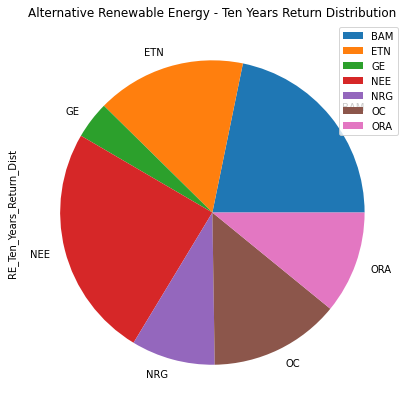

In [34]:
# Display savings DataFrame
display(df_RE_Ret)
# Plot savings pie chart
df_RE_Ret.plot.pie(y="RE_Ten_Years_Return_Dist", title="Alternative Renewable Energy - Ten Years Return Distribution" , figsize=(7, 7));

In [35]:
# Set weight by 10 Years Return
weights = [0.22, 0.16, 0.04, 0.25, 0.09, 0.14, 0.11]

# Calculate portfolio return
PORT_ALT_RE_10Y_return_Weighted = ALT_RE_return.dot(weights)

# Display sample data

 
PORT_ALT_RE_10Y_return_Weighted.head()

Date
2010-01-05    0.002630
2010-01-06    0.000426
2010-01-07    0.005826
2010-01-08   -0.000433
2010-01-11    0.006372
dtype: float64

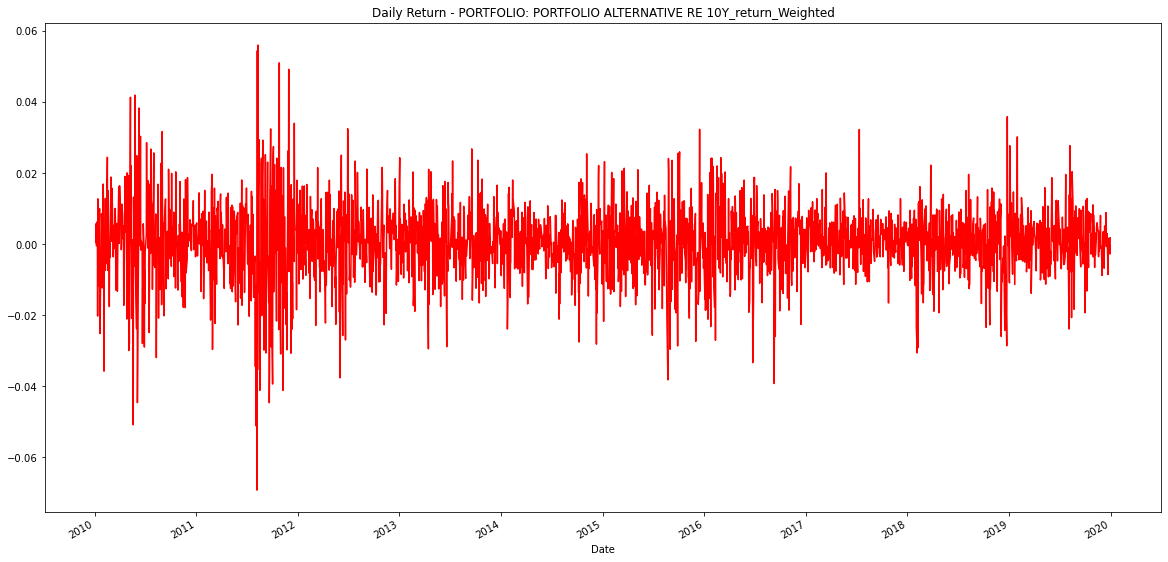

In [36]:
PORT_ALT_RE_10Y_return_Weighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: PORTFOLIO ALTERNATIVE RE 10Y_return_Weighted", color='red');

## **COMBINING ALTERNATIVE RE PORTFOLIOS  AND SPY Returns**

In [37]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_RE = pd.concat([PORT_ALT_RE_EqualyWeighted, PORT_ALT_RE_M_Cap_Weighted, PORT_ALT_RE_Dividend_Weighted, PORT_ALT_RE_10Y_return_Weighted, spy_return], axis="columns", join="inner")

combined_RE.columns = ['PORT_ALT_RE_EqualyWeighted', 'PORT_ALT_RE_M_Cap_Weighted', 'PORT_ALT_RE_Dividend_Weighted', 'PORT_ALT_RE_10Y_return_Weighted', 'SPY']
combined_RE.head()

,PORT_ALT_RE_EqualyWeighted,PORT_ALT_RE_M_Cap_Weighted,PORT_ALT_RE_Dividend_Weighted,PORT_ALT_RE_10Y_return_Weighted,SPY
Date,,,,,
2010-01-05,0.004027,-0.000171,0.004349,0.002630,0.002647
2010-01-06,0.000859,0.000634,0.005499,0.000426,0.000704
2010-01-07,0.010910,0.014893,0.007932,0.005826,0.004221
2010-01-08,0.000435,0.004884,-0.001367,-0.000433,0.003328
2010-01-11,0.008559,0.005866,0.011897,0.006372,0.001397


---

# **Conduct Quantitative Analysis**

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## **Performance Anlysis**

#### **Calculate and Plot the daily returns.**

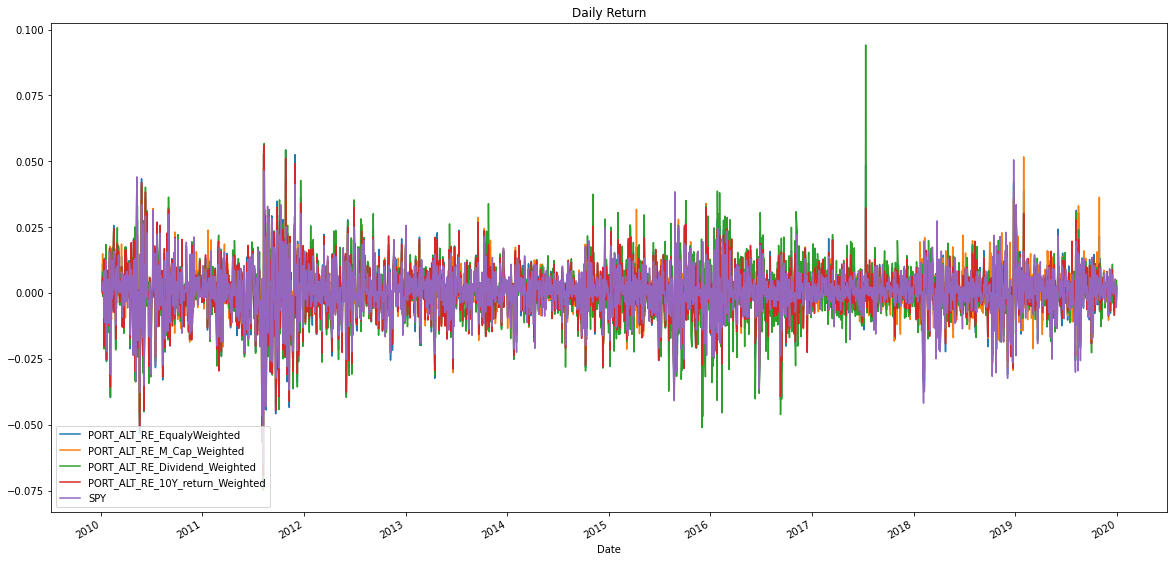

In [38]:
# Plot daily returns of all portfolios
combined_RE.plot(figsize=(20,10), title = "Daily Return").legend(loc='lower left');

#### **Calculate and Plot cumulative returns.**

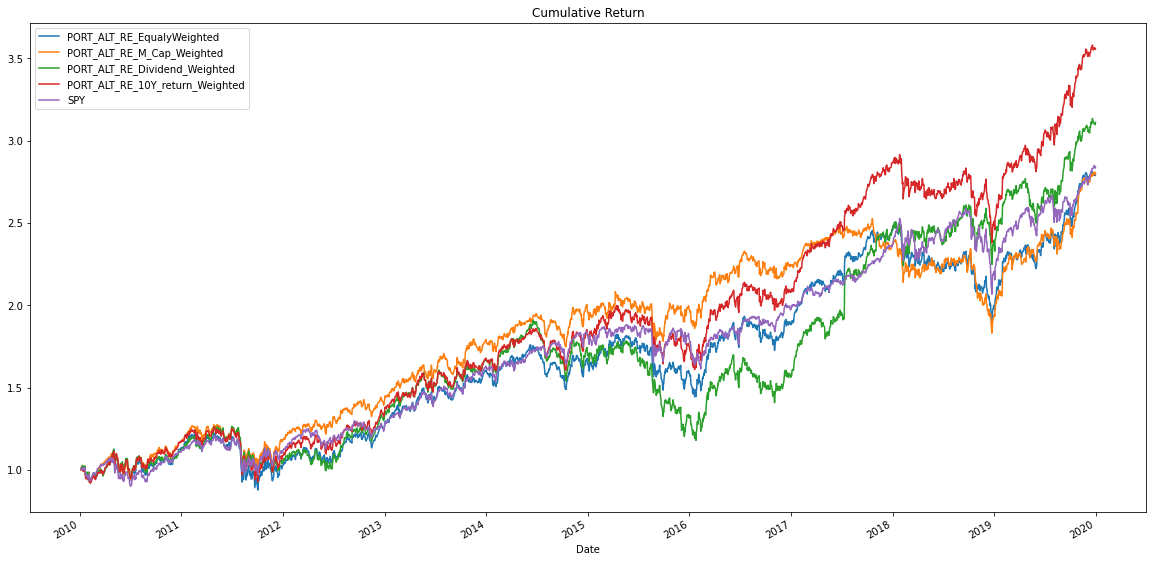

In [39]:
# Calculate cumulative returns of all portfolios
#cumulative_returns = (1 + daily_returns).cumprod()
#cumulative_returns.head()
# Plot cumulative returns
cumulative_returns = (1 + combined_RE).cumprod()
cumulative_returns.plot(figsize=(20,10), title = "Cumulative Return");

In [40]:
cumulative_returns.tail()

,PORT_ALT_RE_EqualyWeighted,PORT_ALT_RE_M_Cap_Weighted,PORT_ALT_RE_Dividend_Weighted,PORT_ALT_RE_10Y_return_Weighted,SPY
Date,,,,,
2019-12-24,2.795747,2.796562,3.110376,3.555664,2.834466
2019-12-26,2.795430,2.808807,3.103144,3.561711,2.849554
2019-12-27,2.795041,2.809027,3.104174,3.564432,2.848848
2019-12-30,2.787982,2.794785,3.097134,3.554593,2.833142
2019-12-31,2.795492,2.803632,3.111869,3.561054,2.840025


In [41]:
cumulative_returns.sum()

PORT_ALT_RE_EqualyWeighted         4203.085556
PORT_ALT_RE_M_Cap_Weighted         4573.462137
PORT_ALT_RE_Dividend_Weighted      4260.984930
PORT_ALT_RE_10Y_return_Weighted    4732.252274
SPY                                4356.110915
dtype: float64

### Cumulative Return Plot: In this graph we can see portfolios Algo_1 and BH_Inc have cumulative returns bigger than S&P 500, being Algo_1 the one with the Highest cumulative return over all, and P_G_Co_Inc the portfolio with the lowest cumulative return over all.

---

## **Risk Analysis**

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### **Create a box plot for each portfolio**


PORT_ALT_RE_M_Cap_Weighted         0.000456
SPY                                0.000458
PORT_ALT_RE_EqualyWeighted         0.000471
PORT_ALT_RE_Dividend_Weighted      0.000524
PORT_ALT_RE_10Y_return_Weighted    0.000560
dtype: float64

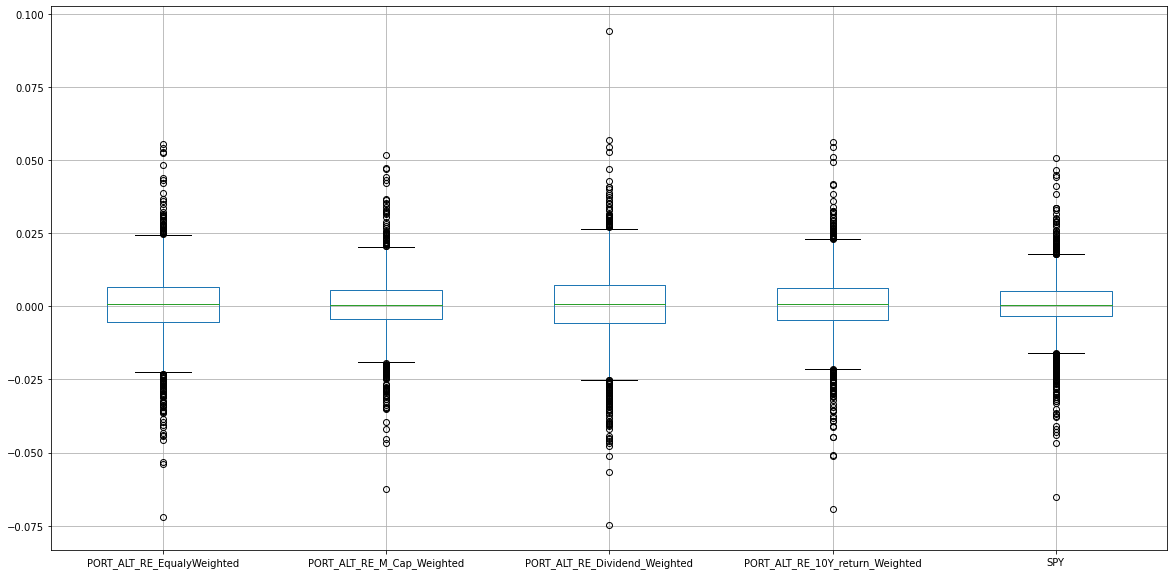

In [42]:
# Box plot to visually show risk

combined_RE.boxplot(figsize=(20,10));
combined_RE.mean().sort_values()

### **Calculate Standard Deviations**


In [43]:
# Calculate the daily standard deviations of all portfolios
#from daily_returns
combined_RE.dropna().head()

,PORT_ALT_RE_EqualyWeighted,PORT_ALT_RE_M_Cap_Weighted,PORT_ALT_RE_Dividend_Weighted,PORT_ALT_RE_10Y_return_Weighted,SPY
Date,,,,,
2010-01-05,0.004027,-0.000171,0.004349,0.002630,0.002647
2010-01-06,0.000859,0.000634,0.005499,0.000426,0.000704
2010-01-07,0.010910,0.014893,0.007932,0.005826,0.004221
2010-01-08,0.000435,0.004884,-0.001367,-0.000433,0.003328
2010-01-11,0.008559,0.005866,0.011897,0.006372,0.001397


In [44]:
#Standar daily deviation
daily_std = combined_RE.std().sort_values()  
daily_std 

SPY                                0.009275
PORT_ALT_RE_M_Cap_Weighted         0.009593
PORT_ALT_RE_10Y_return_Weighted    0.010500
PORT_ALT_RE_EqualyWeighted         0.011102
PORT_ALT_RE_Dividend_Weighted      0.012060
dtype: float64

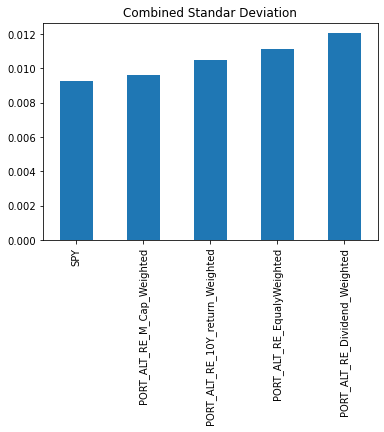

In [45]:
daily_std.plot(kind="bar", title="Combined Standar Deviation");

### **Determine which portfolios are riskier than the S&P 500**

In [46]:
# Calculate  the daily standard deviation of S&P 500
spy_std = combined_RE['SPY'].std()
print("S&P500 Daily Standar Deviation = ", spy_std)

S&P500 Daily Standar Deviation =  0.009275049495769192


In [47]:
combined_RE.std() > spy_std

PORT_ALT_RE_EqualyWeighted          True
PORT_ALT_RE_M_Cap_Weighted          True
PORT_ALT_RE_Dividend_Weighted       True
PORT_ALT_RE_10Y_return_Weighted     True
SPY                                False
dtype: bool

### **Calculate the Annualized Standard Deviation**

In [48]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = (daily_std * np.sqrt(252)).sort_values()
annualized_std.head(12)

SPY                                0.147237
PORT_ALT_RE_M_Cap_Weighted         0.152280
PORT_ALT_RE_10Y_return_Weighted    0.166682
PORT_ALT_RE_EqualyWeighted         0.176232
PORT_ALT_RE_Dividend_Weighted      0.191452
dtype: float64

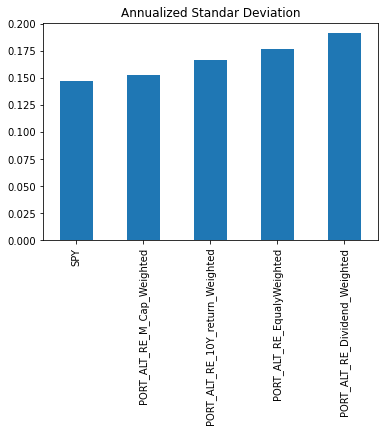

In [49]:
annualized_std.plot(kind="bar", title="Annualized Standar Deviation");

---

## **Rolling Statistics**

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### **Calculate and plot rolling `std` for all portfolios with 21-day window**

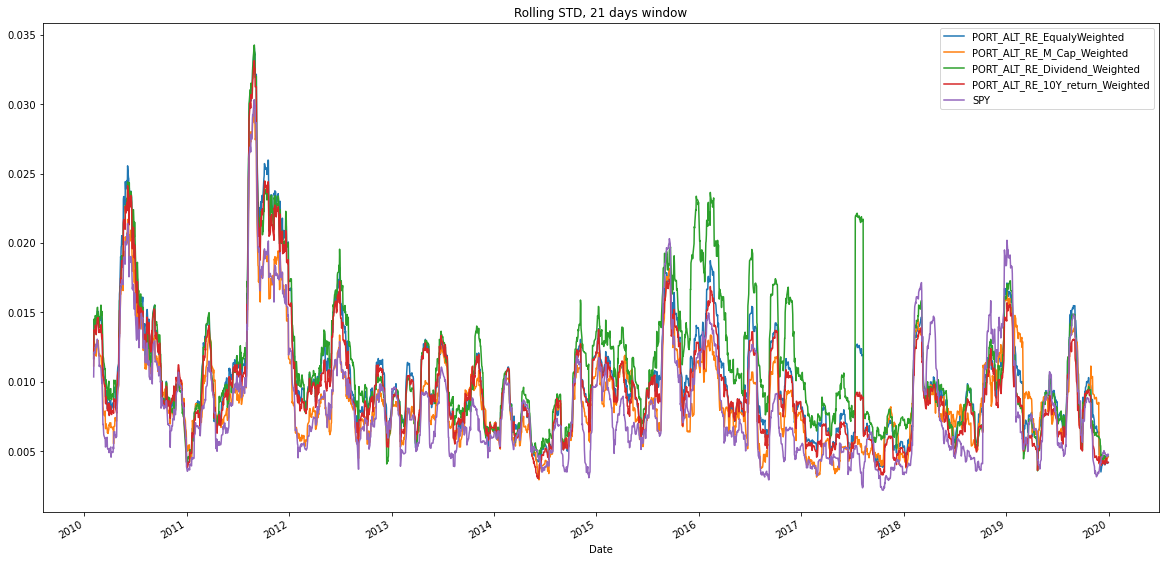

In [50]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

combined_RE.rolling(window=21).std().plot(figsize=(20,10), title = "Rolling STD, 21 days window");

#### **Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500**


In [51]:
# Calculate the correlation
# Display de correlation matrix

correlation = combined_RE.corr()
correlation

,PORT_ALT_RE_EqualyWeighted,PORT_ALT_RE_M_Cap_Weighted,PORT_ALT_RE_Dividend_Weighted,PORT_ALT_RE_10Y_return_Weighted,SPY
PORT_ALT_RE_EqualyWeighted,1.000000,0.906718,0.948220,0.982505,0.847931
PORT_ALT_RE_M_Cap_Weighted,0.906718,1.000000,0.819593,0.907990,0.824137
PORT_ALT_RE_Dividend_Weighted,0.948220,0.819593,1.000000,0.934444,0.776321
PORT_ALT_RE_10Y_return_Weighted,0.982505,0.907990,0.934444,1.000000,0.852793
SPY,0.847931,0.824137,0.776321,0.852793,1.000000


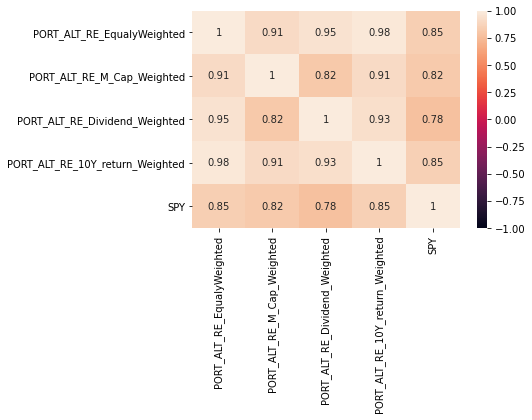

In [52]:
# Using 'heatmap` function to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True);

#### Answer:  The portfolio that mimic the S&P 500 behavior  is __Algo_2, followed by SFM_LLC

### **Calculate and Plot Beta for a chosen portfolio and the S&P 500**
#### I choose portfolio Algo_1

In [53]:
# Calculate covariance of a single portfolio

PORT_ALT_RE_Dividend_Weighted_cov = combined_RE['PORT_ALT_RE_Dividend_Weighted'].cov(combined_RE['SPY'])

print(f"PORT_ALT_RE_Dividend_Weighted_cov = {PORT_ALT_RE_Dividend_Weighted_cov}")

PORT_ALT_RE_Dividend_Weighted_cov = 8.683963025686035e-05


In [54]:
# Calculate variance of S&P 500

spy_variance = combined_RE['SPY'].var()

print(f"SPY Variance = {spy_variance}")

SPY Variance = 8.602654314896833e-05


In [55]:
# Computing beta
# Calculating beta of all daily returns of Algo 1

PORT_ALT_RE_Dividend_Weighted_beta = PORT_ALT_RE_Dividend_Weighted_cov / spy_variance

print(f"PORT_ALT_RE_Dividend_Weighted_beta = {PORT_ALT_RE_Dividend_Weighted_beta}")

PORT_ALT_RE_Dividend_Weighted_beta = 1.0094515841056642


### **Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500**

#### I choose Portfolio Algo_1

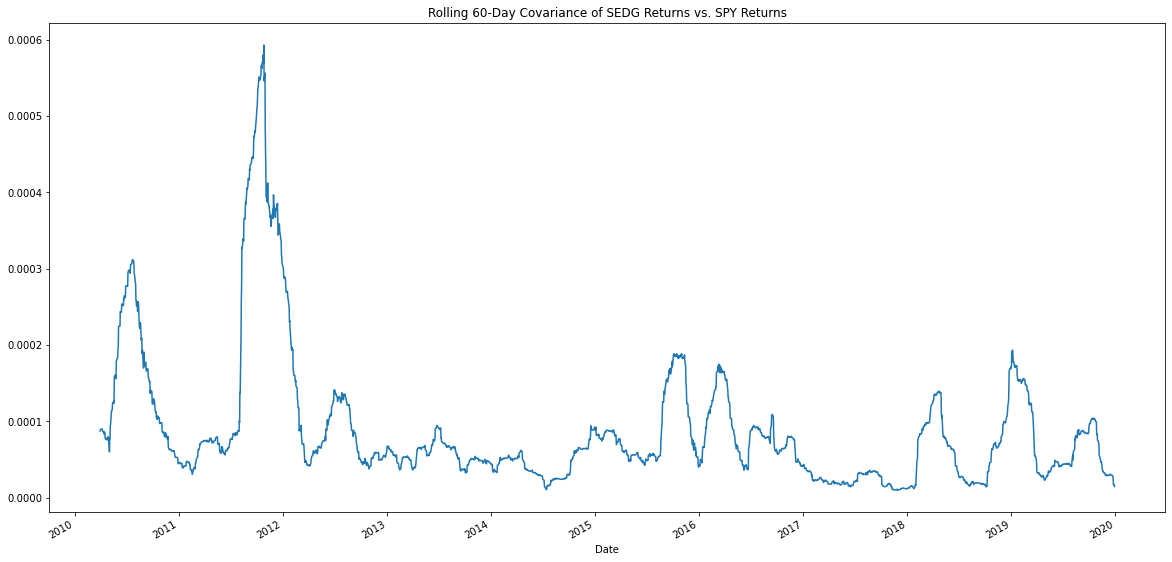

In [56]:
# Calculate 30-day rolling covariance of Algo 1 vs. S&P 500 and plot the data
rolling_covariance_60 = combined_RE['PORT_ALT_RE_Dividend_Weighted'].rolling(window=60).cov(combined_RE['SPY'])
rolling_covariance_60.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of SEDG Returns vs. SPY Returns');

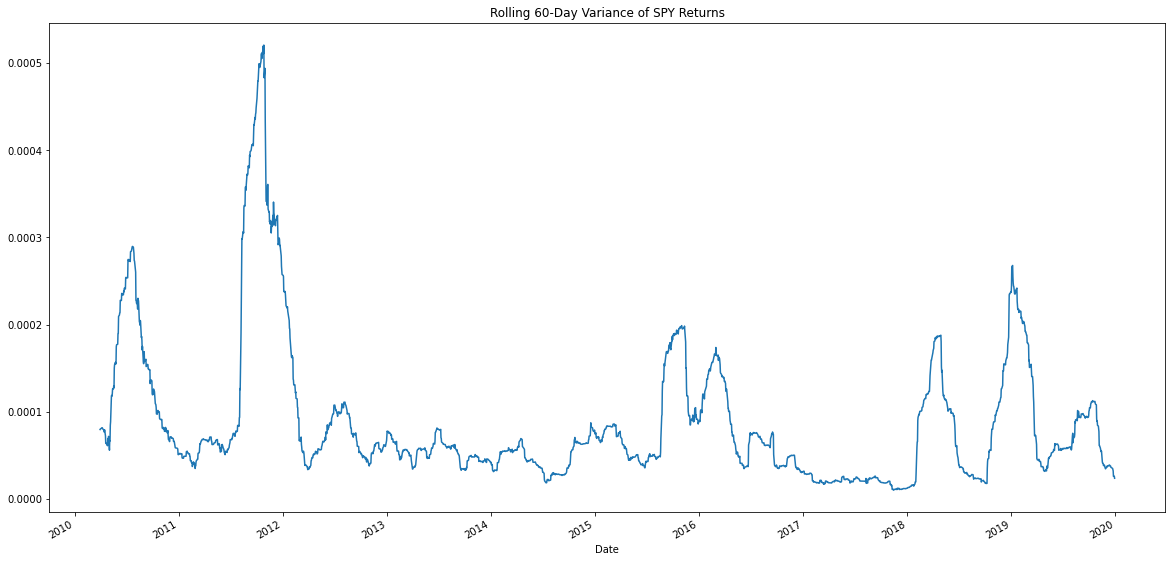

In [57]:
# Calculate 30-day rolling variance of Algo 1 vs. S&P 500 and plot the data
rolling_variance_60 = combined_RE['SPY'].rolling(window=60).var()
rolling_variance_60.plot(figsize=(20, 10), title='Rolling 60-Day Variance of SPY Returns');

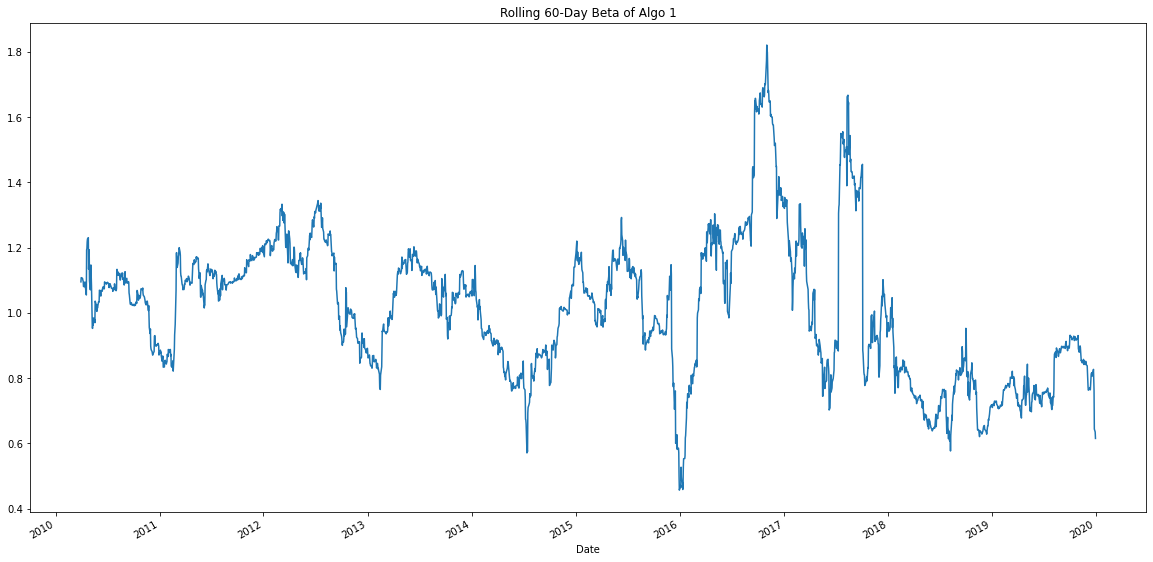

In [58]:
# Calculate 30-day rolling beta of Algo 1 and plot the data
rolling_beta_60 = rolling_covariance_60 / rolling_variance_60
rolling_beta_60.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1');

### In the Rolling 60-Day Beta of Algo_1 vs S&P 500 we can see how disperse are Algo_1 data is from S&P500 data. Algo_1 has a high volatility and does not follow the Market(S&P 500) 

## **Rolling Statistics Challenge: Exponentially Weighted Average**

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

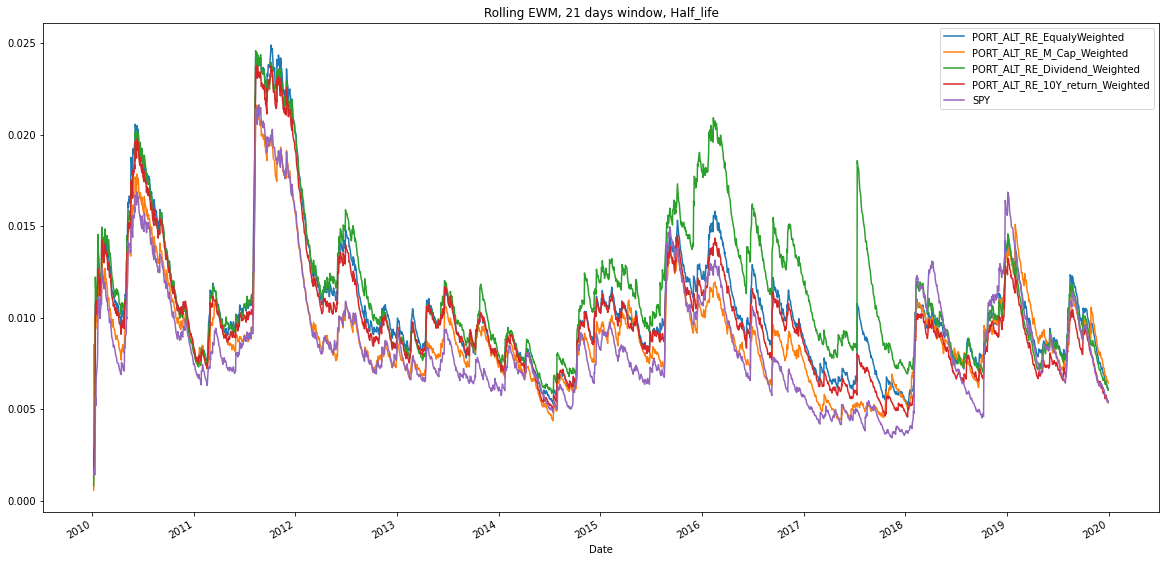

In [59]:
# Use `ewm` to calculate the rolling window
# https://www.statology.org/exponential-moving-average-pandas/

combined_RE.ewm(halflife=21).std().plot(figsize=(20,10), title='Rolling EWM, 21 days window, Half_life');

#### This Rolling EWN Plot also corraborate the high volatility for TGM_LLC and BH__Inc and the lowest volatility for P_&_Co_Inc

---

# **Sharpe Ratios**


### **Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot**

In [60]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_RE.mean()*252) / (combined_RE.std()*np.sqrt(252))
sharpe_ratios 

PORT_ALT_RE_EqualyWeighted         0.672842
PORT_ALT_RE_M_Cap_Weighted         0.754634
PORT_ALT_RE_Dividend_Weighted      0.690043
PORT_ALT_RE_10Y_return_Weighted    0.847123
SPY                                0.784263
dtype: float64

In [61]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.sort_values(inplace = True)
sharpe_ratios

PORT_ALT_RE_EqualyWeighted         0.672842
PORT_ALT_RE_Dividend_Weighted      0.690043
PORT_ALT_RE_M_Cap_Weighted         0.754634
SPY                                0.784263
PORT_ALT_RE_10Y_return_Weighted    0.847123
dtype: float64

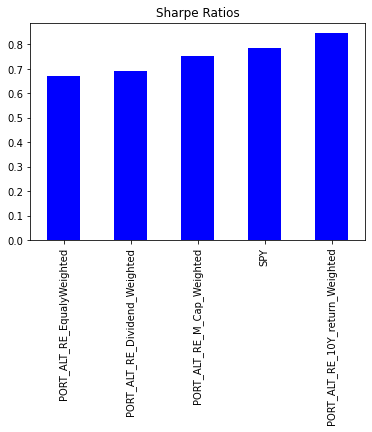

In [63]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", color='blue');

---